In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('dataset_tratado.csv')

In [4]:
X = df.iloc[:, :-1]  # Armazenando todas as colunas de características, exceto a última pois ela é a coluna de rótulo
y = df.iloc[:, -1]   # Armazenado a última coluna, que será o nosso rótulo


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy 0.8058823529411765
[LightGBM] [Info] Number of positive: 314, number of negative: 1046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 504
[LightGBM] [Info] Number of data points in the train set: 1360, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230882 -> initscore=-1.203336
[LightGBM] [Info] Start training from score -1.203336


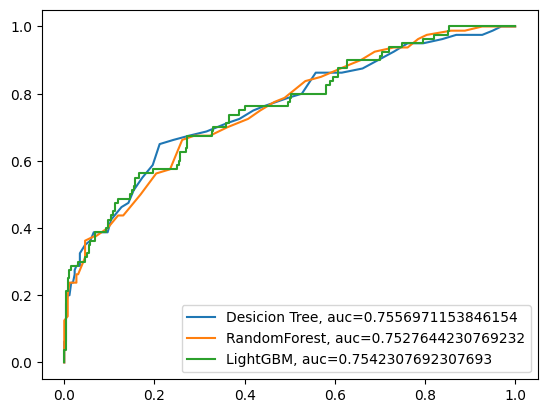

In [25]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

#AUC Curve
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="Desicion Tree, auc="+str(auc))
plt.legend(loc=4)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))
plt.legend(loc=4)

import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="LightGBM, auc="+str(auc))
plt.legend(loc=4)
plt.show()